<a href="https://colab.research.google.com/github/AK47BHARATH/vulnarable-post-detection/blob/main/terrorism_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def notify(SUBJECT, TEXT):
  # Python code to illustrate Sending mail
  # to multiple users
  # from your Gmail account

  # list of email_id to send the mail 

  print(TEXT)


1/1 [==============================] - 1s 828ms/step
Confidence score: 0.9999751
 Terrorism


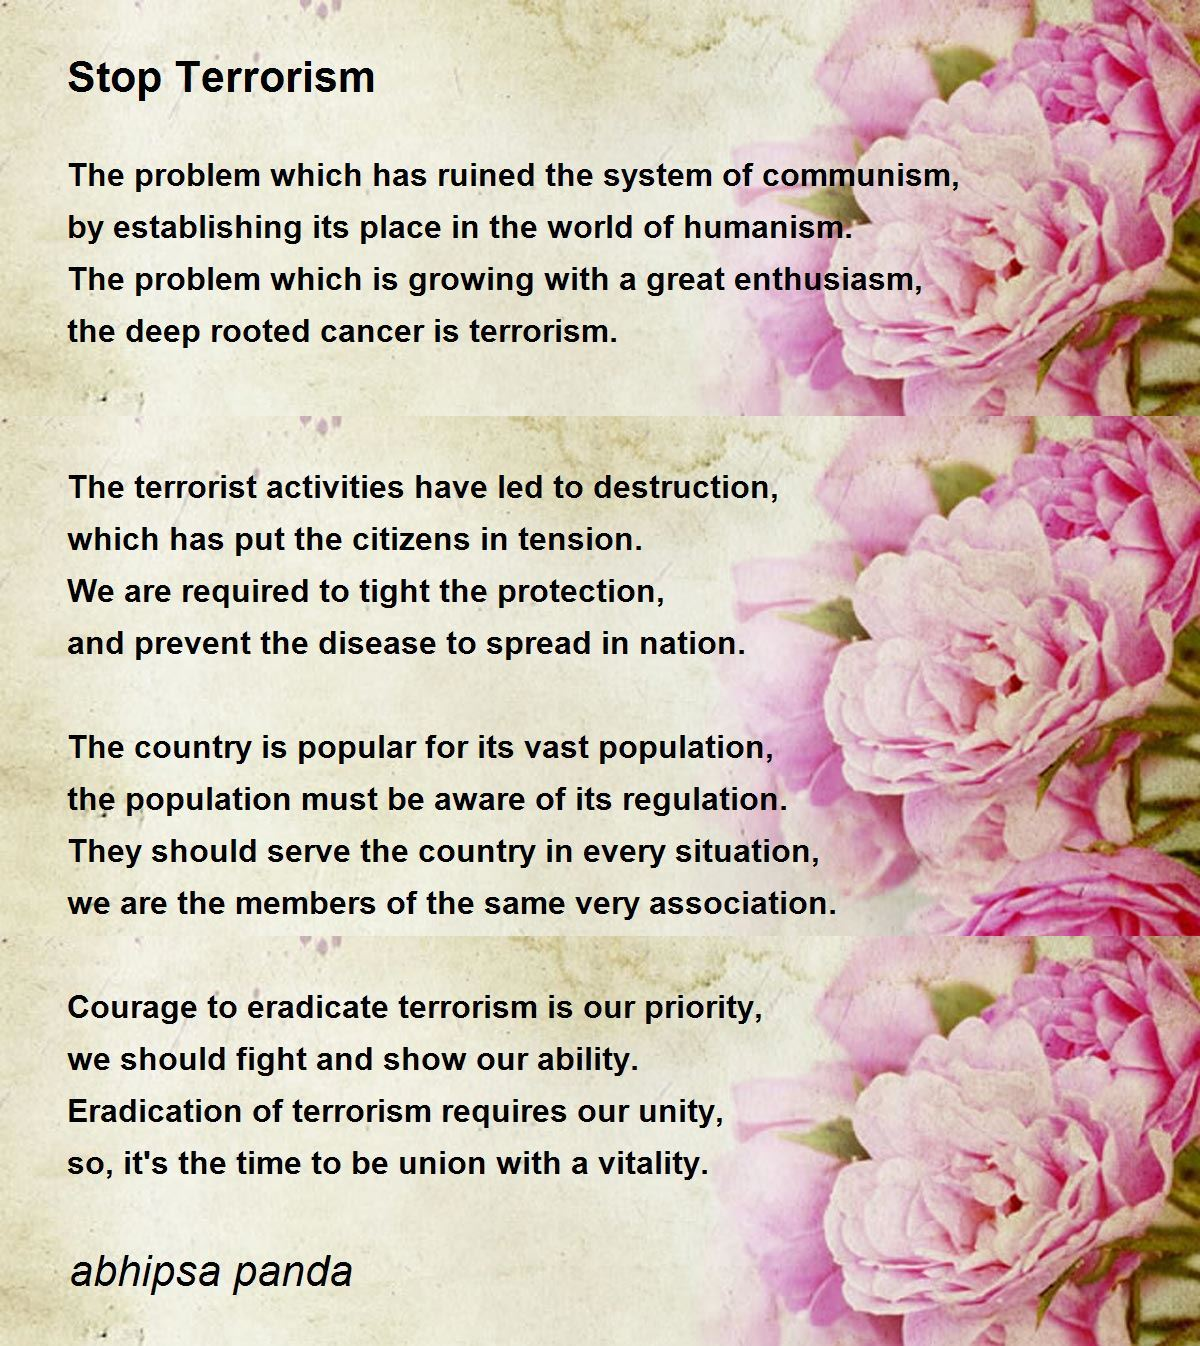

In [103]:
from keras.models import load_model
from PIL import Image, ImageOps #Install pillow instead of PIL
import numpy as np
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image, ImageOps
import numpy as np
import cv2



from google.colab import drive

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model('/content/drive/MyDrive/keras_model.h5', compile=False)

# Load the labels
class_names = open('/content/drive/MyDrive/labels.txt', 'r').readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/drive/MyDrive/image/terrorism4.jpg').convert('RGB')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.LANCZOS)

#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

print('Confidence score:', confidence_score)

# condition checking
if prediction[0][1] < prediction[0][0]:
  notify("Alert!", " Terrorism")
  from IPython.display import Image, display
  display(Image('/content/drive/MyDrive/image/stop-terrorism.jpg'))

else:
  notify( "Alert!","non Terrorism")

  # insert ak's code here
